# Principal component analysis (PCA)
Reference:  <br>
Prepocessing: https://qiita.com/kusmoto/items/058abc5b97ebfe77cf01  <br>
Visualization: https://github.com/teddyroland/python-biplot  <br>
Data: https://www.kaggle.com/uciml/autompg-dataset  <br>
Standardization, Contribution: https://qiita.com/maskot1977/items/082557fcda78c4cdb41f

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Use "auto-mpg" dataset from https://www.kaggle.com/uciml/autompg-dataset
df = pd.read_csv('auto-mpg.csv')
print(df.shape)
df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Use car name as index
df_i = df.set_index('car name')
df_i.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
# Return "False" if non-numerical values are contained
df_i[df_i.columns.values].apply(lambda s:pd.to_numeric(s, errors='coerce')).notnull().all()

mpg              True
cylinders        True
displacement     True
horsepower      False
weight           True
acceleration     True
model year       True
origin           True
dtype: bool

In [5]:
# Find index if non-numeric values are contained
non_num_idx = df_i[['horsepower']][df_i['horsepower'].apply(lambda s:pd.to_numeric(s, errors='coerce')).isnull()]
print(non_num_idx.index)
non_num_idx

Index(['ford pinto', 'ford maverick', 'renault lecar deluxe',
       'ford mustang cobra', 'renault 18i', 'amc concord dl'],
      dtype='object', name='car name')


,horsepower
car name,
ford pinto,?
ford maverick,?
renault lecar deluxe,?
ford mustang cobra,?
renault 18i,?
amc concord dl,?


In [7]:
# Remove rows where non-numeric values are contained
dat_rm = df_i.drop(non_num_idx.index, axis = 0)
print(dat_rm.shape)
dat_rm.head()

(383, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
# Remove "model year" and "origin" for this PCA
dat_o = dat_rm.drop(['origin', 'model year'], axis = 1)
print(dat_o.shape)
dat_o.head()

(383, 6)


,mpg,cylinders,displacement,horsepower,weight,acceleration
car name,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0
buick skylark 320,15.0,8,350.0,165,3693,11.5
plymouth satellite,18.0,8,318.0,150,3436,11.0
amc rebel sst,16.0,8,304.0,150,3433,12.0
ford torino,17.0,8,302.0,140,3449,10.5


In [9]:
# Return "False" if non-numerical values are contained - secondary check just in case
dat_o[dat_o.columns.values].apply(lambda s:pd.to_numeric(s, errors='coerce')).notnull().all()

mpg             True
cylinders       True
displacement    True
horsepower      True
weight          True
acceleration    True
dtype: bool

In [10]:
# Convert variables to float type
dat_o.iloc[:, 0:] = dat_o.iloc[:, 0:].astype(np.float64)

In [11]:
# Save the cleansed file
dat_o.to_csv('auto-mpg_clean.csv')

In [12]:
# Standardization
dat = dat_o.iloc[:, 0:].apply(lambda x: (x - x.mean()) / x.std(), axis=0)
dat.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
car name,,,,,,
chevrolet chevelle malibu,-0.699008,1.4665,1.062535,0.645121,0.607583,-1.267672
buick skylark 320,-1.080321,1.4665,1.469803,1.547725,0.827988,-1.447961
plymouth satellite,-0.699008,1.4665,1.166720,1.160894,0.528283,-1.628251
amc rebel sst,-0.953217,1.4665,1.034121,1.160894,0.524785,-1.267672
ford torino,-0.826113,1.4665,1.015178,0.903008,0.543443,-1.808540


In [13]:
# Perform PCA
from sklearn.decomposition import PCA

n = len(dat.columns)
pca = PCA(n_components = n)
pca.fit(dat)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# Project data into principal component (PC) space

# 0,1 denote PC1 and PC2
xvector = pca.components_[0]
yvector = pca.components_[1]

xs = pca.transform(dat)[:,0]
ys = pca.transform(dat)[:,1]

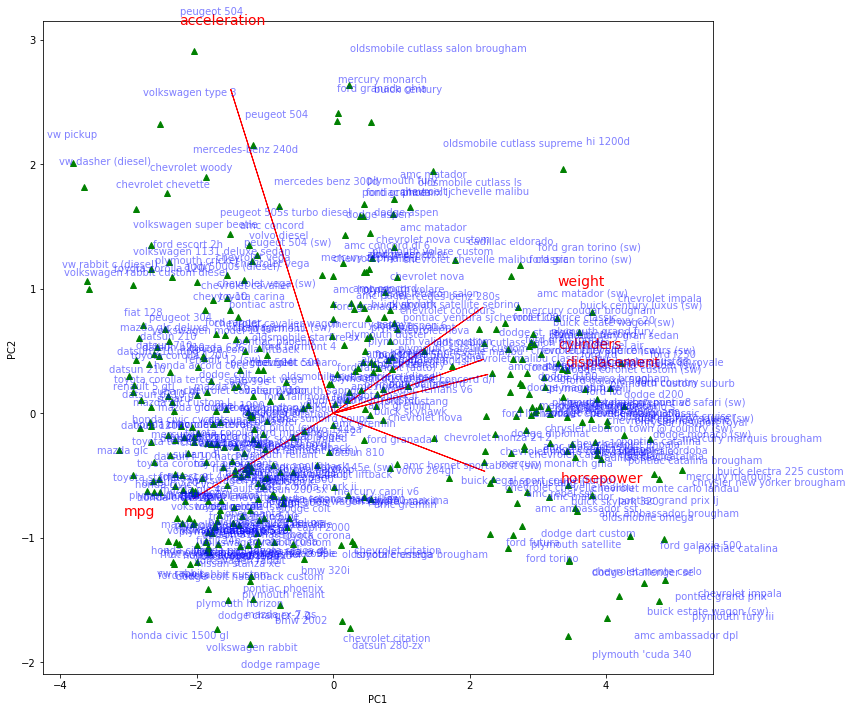

In [15]:
# Visualize projections
    
plt.figure(figsize=(12, 12))

for i in range(len(xvector)):
  plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys), color='r', width=0.0005, head_width=0.0025)
  plt.text(xvector[i]*max(xs)*1.5, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r', fontsize = 14)

for i in range(len(xs)):
  plt.plot(xs[i], ys[i], 'g^')
  plt.text(xs[i]*1.1, ys[i]*1.1, list(dat.index)[i], color='b', alpha = 0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [16]:
# Project data into principal component (PC) space

# 0,2 denote PC1 and PC3
xvector = pca.components_[0]
yvector = pca.components_[2]

xs = pca.transform(dat)[:,0]
ys = pca.transform(dat)[:,2]

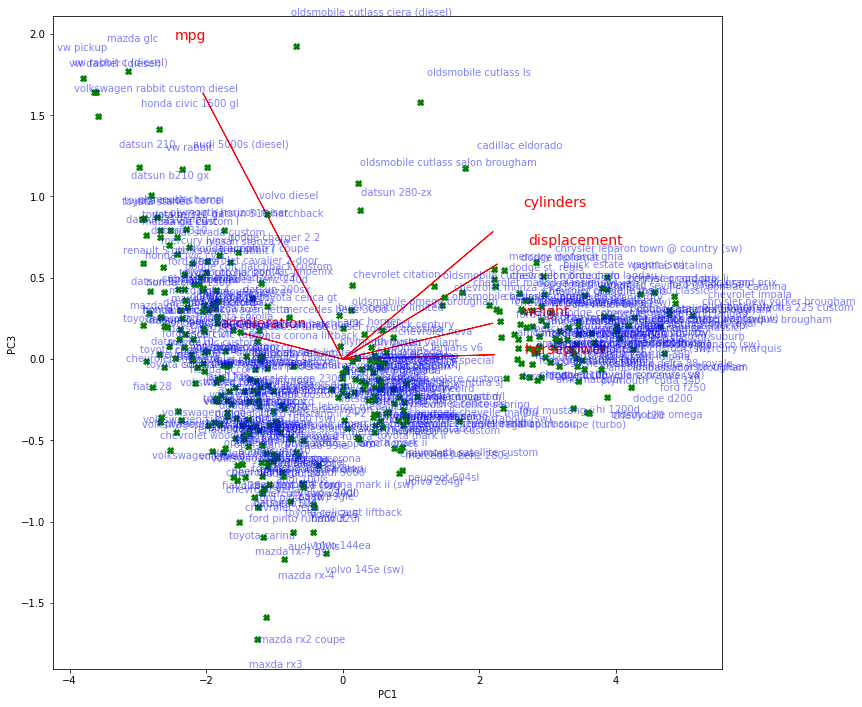

In [17]:
# Visualize projections

plt.figure(figsize=(12, 12))

for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r', fontsize = 14)

for i in range(len(xs)):
    plt.plot(xs[i], ys[i], 'gX')
    plt.text(xs[i]*1.1, ys[i]*1.1, list(dat.index)[i], color='b', alpha = 0.5)

plt.xlabel("PC1")
plt.ylabel("PC3")
plt.savefig('pca_biplot_PC1_vs_PC3.png')
plt.show()

In [18]:
# Contribuion rates
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dat.columns))])

,0
PC1,0.800984
PC2,0.120229
PC3,0.042366
PC4,0.020204
PC5,0.010357
PC6,0.005861


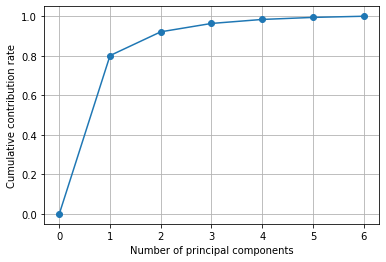

In [19]:
# Visualize cumulative contribution rate
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()